# Final Lập trình xử lí dữ liệu
## Đề bài: 

### Phân tích biến động giá cổ phiếu

## Bài làm:

### **1.0.** Trước tiên, import các thư viện cần:

In [152]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1.1.** Chọn cổ phiếu:
 Cổ phiếu được chọn là của Tencent Holdings Limited (viết tắt: THL) được niêm yết chính thức trên sàn chứng khoán Hồng Kông (HKEX) với mã cổ phiếu 0700.HK. Thời gian khảo sát là 5 năm (2020-2025). Nguồn dữ liệu từ Yahoo Finance – được coi là tương đối đáng tin cậy trong giới đầu tư, tuy nhiên một số sai số nhỏ hoặc chênh lệch thời gian vẫn có thể xảy ra.

 ### **1.2.** Thu thập dữ liệu giá cổ phiếu:
 Ta sẽ dùng thư viện yfinance để lấy dữ liệu cổ phiếu Tencent.

In [153]:
symbol = "0700.HK"
df = yf.Ticker(symbol).history(period = "5y").reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.to_csv("tencent_stock_data.csv", index=False, encoding="utf-8-sig")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
1,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
2,2020-06-23 00:00:00+08:00,428.437689,445.039665,424.153327,443.968567,33983938,0.0,0.0
3,2020-06-24 00:00:00+08:00,448.074400,450.752130,438.077515,438.077515,25018502,0.0,0.0
4,2020-06-26 00:00:00+08:00,434.150203,440.041198,431.650974,432.900574,19393757,0.0,0.0


### **1.3.** Làm sạch và tiền xử lí:


**1.3.1** Kiểm tra missing value:

Theo thông báo chính thức từ HKEX, sàn tiến hành giao dịch vào các ngày từ thứ 2 đến thứ 6, trừ các ngày nghỉ lễ theo lịch của HongKong. Với những ngày nghỉ, tổng khối lượng giao dịch (Volume) sẽ bằng 0. Ta tìm và loại bỏ những ngày này.

In [154]:
df = df[df['Volume'] > 0]  
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
1,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
2,2020-06-23 00:00:00+08:00,428.437689,445.039665,424.153327,443.968567,33983938,0.0,0.0
3,2020-06-24 00:00:00+08:00,448.074400,450.752130,438.077515,438.077515,25018502,0.0,0.0
4,2020-06-26 00:00:00+08:00,434.150203,440.041198,431.650974,432.900574,19393757,0.0,0.0


Ngoài ra, trong các phiên giao dịch của HKEX, tồn tại những phiên giao dịch nửa ngày, sẽ kết thúc vào 12h trưa thay vì 16h chiều như bình thường. Nó có thể làm cho tổng khối lượng giao dịch của cổ phiếu (Volume) thấp hơn bình thường. Các phiên giao dịch cũng có thể ngắt khi chỉ số thị trường giảm mạnh trong một thời gian ngắn (Circurt break), khi có sự cố kĩ thuật hoặc các thảm họa thiên nhiên. Tất cả sự gián đoạn bất thường trên đều ảnh hưởng ít nhiều đến các chỉ số, đặc biệt là Volume. Ta cũng cần loại bỏ các dữ liệu này.

HKEX có cung cấp lịch giao dịch hằng năm. Từ lịch này, ta xác minh được những phiên nửa ngày trong khoảng thời gian khảo sát, bao gồm:



| date       | note                    | type     |
|------------|-------------------------|----------|
| 2020-12-24 | Christmas Eve           | half-day |
| 2020-12-31 | New Year’s Eve          | half-day |
| 2021-02-09 | Lunar New Year’s Eve    | half-day |
| 2021-12-24 | Christmas Eve           | half-day |
| 2021-12-31 | New Year’s Eve          | half-day |
| 2022-01-31 | Lunar New Year’s Eve    | half-day |
| 2024-02-09 | Lunar New Year’s Eve    | half-day |
| 2024-12-24 | Christmas Eve           | half-day |
| 2024-12-31 | New Year’s Eve          | half-day |
| 2025-01-28 | Lunar New Year’s Eve    | half-day |
| 2025-12-24 | Christmas Eve           | half-day |
| 2025-12-31 | New Year’s Eve          | half-day |


Tiến hành loại bỏ những ngày này khỏi dữ liệu:

In [155]:
half_day_dates = [
    "2020-12-24", "2020-12-31", "2021-02-09", "2021-12-24", "2021-12-31",
    "2022-01-31", "2024-02-09", "2024-12-24", "2024-12-31",
    "2025-01-28", "2025-12-24", "2025-12-31"
]
half_day_dates = pd.to_datetime(half_day_dates)

df_filtered = df[~df['Date'].isin(half_day_dates)]
df = df_filtered

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
1,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
2,2020-06-23 00:00:00+08:00,428.437689,445.039665,424.153327,443.968567,33983938,0.0,0.0
3,2020-06-24 00:00:00+08:00,448.074400,450.752130,438.077515,438.077515,25018502,0.0,0.0
4,2020-06-26 00:00:00+08:00,434.150203,440.041198,431.650974,432.900574,19393757,0.0,0.0


**1.3.2** Kiểm tra trùng lặp:

In [156]:
if (df.duplicated().sum()) == 0:
    print("Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng")
else:
    print("Dữ liệu có giá trị thiếu")    

Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng


**1.3.3** Chuyển cột ngày tháng về định dạng `datetime`

In [157]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
1,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
2,2020-06-23 00:00:00+08:00,428.437689,445.039665,424.153327,443.968567,33983938,0.0,0.0
3,2020-06-24 00:00:00+08:00,448.074400,450.752130,438.077515,438.077515,25018502,0.0,0.0
4,2020-06-26 00:00:00+08:00,434.150203,440.041198,431.650974,432.900574,19393757,0.0,0.0


**1.3.4** Sort theo ngày:

In [158]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
1,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
2,2020-06-23 00:00:00+08:00,428.437689,445.039665,424.153327,443.968567,33983938,0.0,0.0
3,2020-06-24 00:00:00+08:00,448.074400,450.752130,438.077515,438.077515,25018502,0.0,0.0
4,2020-06-26 00:00:00+08:00,434.150203,440.041198,431.650974,432.900574,19393757,0.0,0.0


**1.3.5** Kiểm tra outliers

Vì đã loại bỏ hết tất cả những bất thường do yếu tố khách quan (sàn giao dịch, thời gian giao dịch), nên outliers (nếu có xuất hiện) chính là do các giá trị lên xuống bất chợt do hoảng loạn mà không phản ánh giá trị thực của cổ phiếu. Ta loại bỏ các giá trị này.

Phương pháp được sử dụng để loại bỏ outliers là tứ phân vị (IQR). Đầu tiên, ta sẽ sắp xếp dữ liệu theo chiều từ thấp đến cao giá cuối ngày (Close).

In [159]:
df1 = df.sort_values("Close")

Ta tính Q1 (25%) và Q2 (75%) của cột close:

In [160]:
Q1 = df1["Close"].quantile(0.25)
Q3 = df1["Close"].quantile(0.75)

Chỉ số IQR sẽ được tính bằng Q3 - Q1:

In [161]:
IQR = Q3 - Q1

Theo như Tukey Range Test, dữ liệu ngoại lai (outliers) sẽ là những dữ liệu nằm ngoài khoảng (Low, Up) với:



- Low: $Q_1 - 1.5 \times IQR$
- Up: $Q_3 + 1.5 \times IQR$


In [162]:
low = Q1 - 1.5 * IQR
up= Q3 + 1.5 * IQR

Tiến hành loại bỏ outliers ra khỏi dữ liệu:

In [163]:
df = df[(df["Close"] >= low) & (df["Close"] <= up)]
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-06-19 00:00:00+08:00,408.800949,415.584540,407.372818,410.943115,27479164,0.0,0.0
1,2020-06-22 00:00:00+08:00,410.586096,423.617744,409.872031,423.260712,28164190,0.0,0.0
2,2020-06-23 00:00:00+08:00,428.437689,445.039665,424.153327,443.968567,33983938,0.0,0.0
3,2020-06-24 00:00:00+08:00,448.074400,450.752130,438.077515,438.077515,25018502,0.0,0.0
4,2020-06-26 00:00:00+08:00,434.150203,440.041198,431.650974,432.900574,19393757,0.0,0.0


#### Sau các bước làm sạch và tiền xử lí dữ liệu, ta kết luận: ####

Dữ liệu thu thập được từ thư viện `yfinance` cho mã cổ phiếu Tencent (`0700.HK`) đã có đầy đủ các cột cần thiết: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`. Qua kiểm tra sơ bộ:

- Không xuất hiện các giá trị thiếu (`NaN`) trong các cột quan trọng.
- Không phát hiện outliers rõ rệt trong dữ liệu.
- Cột `Date` đã có định dạng thời gian chuẩn `ISO 8601` và được chuyển về kiểu `date time` trong Python để phục vụ phân tích thời gian.

**Do đó, không cần thực hiện thao tác loại bỏ hay xử lí thêm. Dữ liệu đã sẵn sàng để tính toán các chỉ số kỹ thuật và phân tích tiếp theo.**

### **1.4.** Tính toán chỉ số kĩ thuật cơ bản:
**1.4.1.** Trung bình động đơn giản **SMA** với các khoảng 20 ngày, 50 ngày:

In [164]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
1223,2025-06-13 00:00:00+08:00,510.5,515.5,506.0,510.0,19085310,0.0,0.0,511.880,489.838071
1224,2025-06-16 00:00:00+08:00,507.0,512.0,504.5,509.5,13784320,0.0,0.0,511.655,490.174089
1225,2025-06-17 00:00:00+08:00,514.0,514.0,506.5,513.5,11524031,0.0,0.0,511.480,490.451320
1226,2025-06-18 00:00:00+08:00,510.0,511.0,503.5,508.0,15187515,0.0,0.0,510.855,490.618550
1227,2025-06-19 00:00:00+08:00,503.0,506.0,496.0,498.0,19394367,0.0,0.0,509.930,490.708707


**1.4.2.** Trung bình động hàm mũ **EMA** với khoảng 20 ngày:

In [165]:
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA20
1223,2025-06-13 00:00:00+08:00,510.5,515.5,506.0,510.0,19085310,0.0,0.0,511.880,489.838071,508.879470
1224,2025-06-16 00:00:00+08:00,507.0,512.0,504.5,509.5,13784320,0.0,0.0,511.655,490.174089,508.938568
1225,2025-06-17 00:00:00+08:00,514.0,514.0,506.5,513.5,11524031,0.0,0.0,511.480,490.451320,509.372990
1226,2025-06-18 00:00:00+08:00,510.0,511.0,503.5,508.0,15187515,0.0,0.0,510.855,490.618550,509.242229
1227,2025-06-19 00:00:00+08:00,503.0,506.0,496.0,498.0,19394367,0.0,0.0,509.930,490.708707,508.171540


**1.4.3.** Chỉ số sức mạnh tương đối **RSI**:

In [166]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])
df.tail(14)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA20,RSI
1214,2025-06-02 00:00:00+08:00,493.0,499.200012,489.600006,498.399994,13086586,0.0,0.0,506.820930,489.742921,502.782363,47.834120
1215,2025-06-03 00:00:00+08:00,504.0,505.500000,501.000000,505.000000,14609189,0.0,0.0,507.515286,489.116555,502.993566,41.306472
1216,2025-06-04 00:00:00+08:00,510.0,513.000000,507.000000,512.000000,18378499,0.0,0.0,508.837219,488.650015,503.851322,47.572815
1217,2025-06-05 00:00:00+08:00,517.5,517.500000,509.000000,515.000000,19329282,0.0,0.0,509.902699,488.649929,504.913101,55.177517
1218,2025-06-06 00:00:00+08:00,515.5,516.500000,511.000000,515.000000,13137101,0.0,0.0,511.136708,488.808457,505.873758,50.811689
1219,2025-06-09 00:00:00+08:00,520.0,521.000000,512.500000,518.000000,18481403,0.0,0.0,511.385625,488.997245,507.028638,50.811689
1220,2025-06-10 00:00:00+08:00,519.5,520.000000,508.500000,513.500000,17039003,0.0,0.0,511.979567,489.314130,507.644958,44.408944
1221,2025-06-11 00:00:00+08:00,517.0,518.000000,514.500000,518.000000,14784979,0.0,0.0,512.055000,489.631793,508.631153,51.188590
1222,2025-06-12 00:00:00+08:00,518.0,518.000000,508.000000,510.000000,13368048,0.0,0.0,511.780000,489.739888,508.761519,44.252872
1223,2025-06-13 00:00:00+08:00,510.5,515.500000,506.000000,510.000000,19085310,0.0,0.0,511.880000,489.838071,508.879470,50.000000


Vì RSI 14 cần dữ liệu của 14 ngày đầu, SMA 20 hay 50 cần lần lượt 20 hay 50 ngày, tức là tất cả những chỉ số trước đó đều sẽ bị tính là NaN, nên ta sẽ tạo biến df_after_check để lưu trữ dữ liệu của df sau khi loại bỏ 50 dòng đầu, tránh nhầm lẫn trong tính toán sau này

In [167]:
df_after_check = df.iloc[50:]
df_after_check.to_csv("tencent_stock_data_after_checked.csv", index=False, encoding="utf-8-sig")
df_after_check.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA20,RSI
1218,2025-06-06 00:00:00+08:00,515.5,516.5,511.0,515.0,13137101,0.0,0.0,511.136708,488.808457,505.873758,50.811689
1219,2025-06-09 00:00:00+08:00,520.0,521.0,512.5,518.0,18481403,0.0,0.0,511.385625,488.997245,507.028638,50.811689
1220,2025-06-10 00:00:00+08:00,519.5,520.0,508.5,513.5,17039003,0.0,0.0,511.979567,489.314130,507.644958,44.408944
1221,2025-06-11 00:00:00+08:00,517.0,518.0,514.5,518.0,14784979,0.0,0.0,512.055000,489.631793,508.631153,51.188590
1222,2025-06-12 00:00:00+08:00,518.0,518.0,508.0,510.0,13368048,0.0,0.0,511.780000,489.739888,508.761519,44.252872
1223,2025-06-13 00:00:00+08:00,510.5,515.5,506.0,510.0,19085310,0.0,0.0,511.880000,489.838071,508.879470,50.000000
1224,2025-06-16 00:00:00+08:00,507.0,512.0,504.5,509.5,13784320,0.0,0.0,511.655000,490.174089,508.938568,47.920132
1225,2025-06-17 00:00:00+08:00,514.0,514.0,506.5,513.5,11524031,0.0,0.0,511.480000,490.451320,509.372990,56.454392
1226,2025-06-18 00:00:00+08:00,510.0,511.0,503.5,508.0,15187515,0.0,0.0,510.855000,490.618550,509.242229,47.884940
1227,2025-06-19 00:00:00+08:00,503.0,506.0,496.0,498.0,19394367,0.0,0.0,509.930000,490.708707,508.171540,49.823933


### **1.5.** Phân tích dữ liệu:

**1.5.1.** Tính lợi suất ngày, phân phối lợi suất:
- Lợi suất hằng ngày được tính bằng tỷ lệ phần trăm thay đổi giữa giá đóng cửa của ngày hiện tại và ngày trước đó. Lợi suất hằng ngày giúp đánh giá tốc độ tăng/giảm giá trong ngắn hạn.
Biến `Daily Return` được thêm vào để phân tích lợi suất và biến động.

C:\Users\Admin\AppData\Local\Temp\ipykernel_25536\1369906126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_check['Daily Return'] = df_after_check['Close'].pct_change()


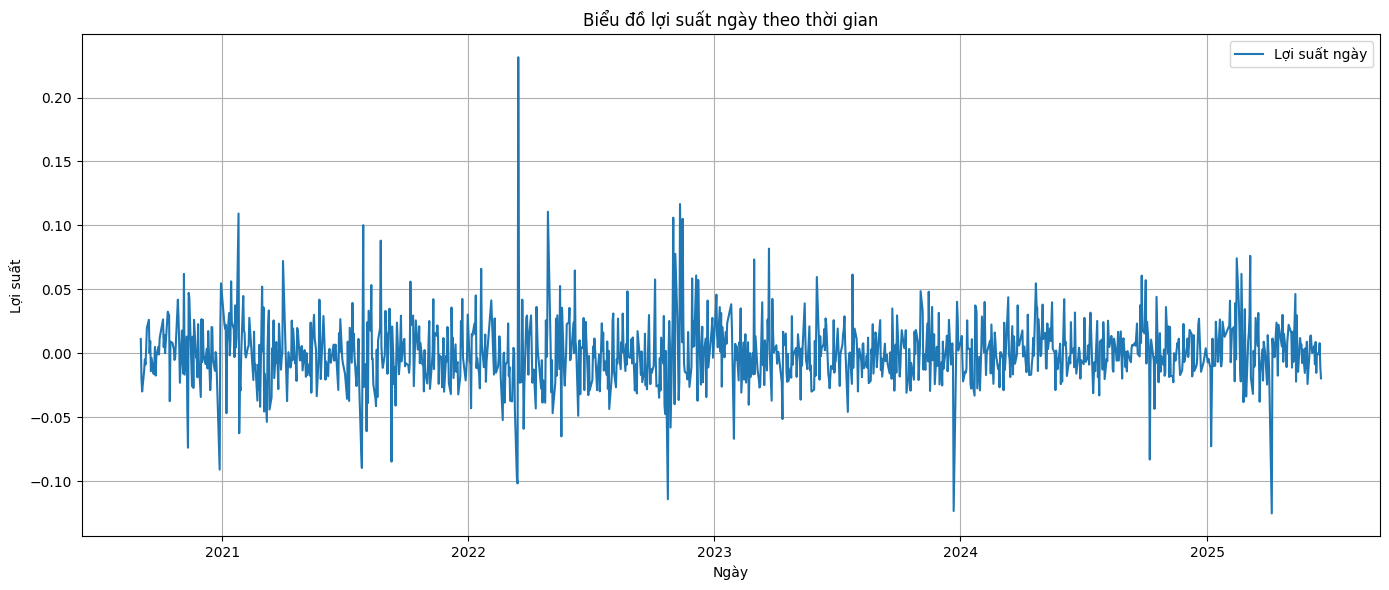

In [168]:
df_after_check['Daily Return'] = df_after_check['Close'].pct_change()
plt.figure(figsize=(14, 6))
plt.plot(df_after_check['Date'], df_after_check['Daily Return'], label='Lợi suất ngày', linewidth=1.5)

plt.title('Biểu đồ lợi suất ngày theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Lợi suất')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Phân phối lợi suất bằng Histogram để xem lợi suất nằm trong khoảng nào, phân phối như thế nào.
- Công thức được sử dụng:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

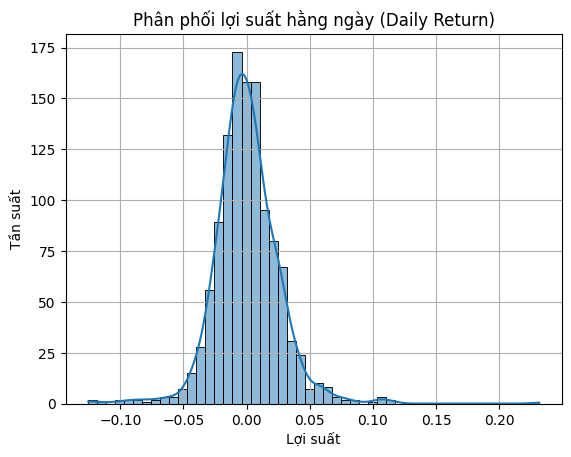

In [169]:
sns.histplot(df_after_check['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Phân phối lợi suất hằng ngày (Daily Return)')
plt.xlabel('Lợi suất')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()


**1.5.2** Tính độ biến động (volatility) theo tháng hoặc quý:


- Độ biến động theo tháng/quý được tính bằng độ lệch chuẩn của lợi suất hằng ngày trong từng tháng/quý đó. Qua đó, có thể xác định được các giai đoạn giá cổ phiếu dao động mạnh.


Vì thời gian khảo sát là tương đối dài (5 năm), ta sẽ ưu tiên tính độ biến động theo quý để dễ dàng theo dõi toàn bộ dữ liệu

C:\Users\Admin\AppData\Local\Temp\ipykernel_25536\2598995308.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_after_check['Quarter'] = df_after_check['Date'].dt.to_period('Q')
C:\Users\Admin\AppData\Local\Temp\ipykernel_25536\2598995308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_check['Quarter'] = df_after_check['Date'].dt.to_period('Q')


Quarter
2020Q3    0.013867
2020Q4    0.027629
2021Q1    0.029914
2021Q2    0.019013
2021Q3    0.033509
2021Q4    0.020555
2022Q1    0.043563
2022Q2    0.030369
2022Q3    0.018316
2022Q4    0.039751
2023Q1    0.026445
2023Q2    0.019437
2023Q3    0.017988
2023Q4    0.024704
2024Q1    0.019814
2024Q2    0.018295
2024Q3    0.016611
2024Q4    0.020543
2025Q1    0.027322
2025Q2    0.022666
Freq: Q-DEC, Name: Daily Return, dtype: float64

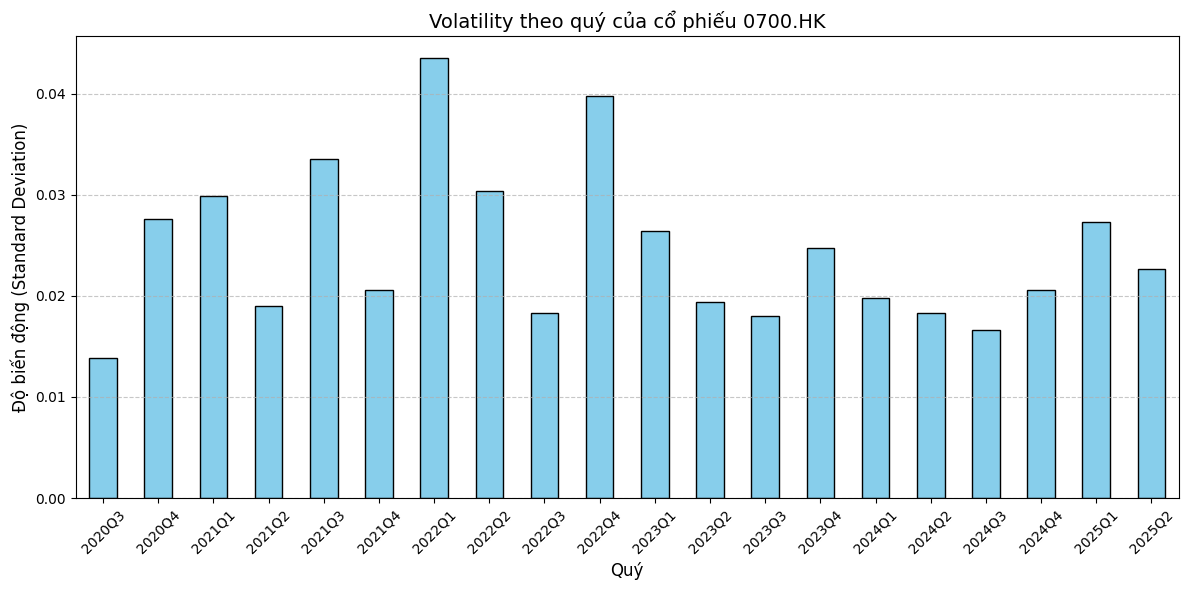

In [170]:
df_after_check['Quarter'] = df_after_check['Date'].dt.to_period('Q')
quarter_volatility = df_after_check.groupby('Quarter')['Daily Return'].std()
display(quarter_volatility)
plt.figure(figsize=(12, 6))
quarter_volatility.plot(kind='bar', color='skyblue', edgecolor='black')

# Tùy chỉnh biểu đồ
plt.title('Volatility theo quý của cổ phiếu 0700.HK', fontsize=14)
plt.xlabel('Quý', fontsize=12)
plt.ylabel('Độ biến động (Standard Deviation)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

**1.5.3**  • Phân tích tương quan giữa giá đóng cửa và các chỉ số SMA, RSI.


                 Close    SMA_20     EMA20       RSI  Daily Return
Close         1.000000  0.969702  0.978283  0.190449      0.051013
SMA_20        0.969702  1.000000  0.998420 -0.023359     -0.039588
EMA20         0.978283  0.998420  1.000000  0.017180     -0.034765
RSI           0.190449 -0.023359  0.017180  1.000000      0.272894
Daily Return  0.051013 -0.039588 -0.034765  0.272894      1.000000


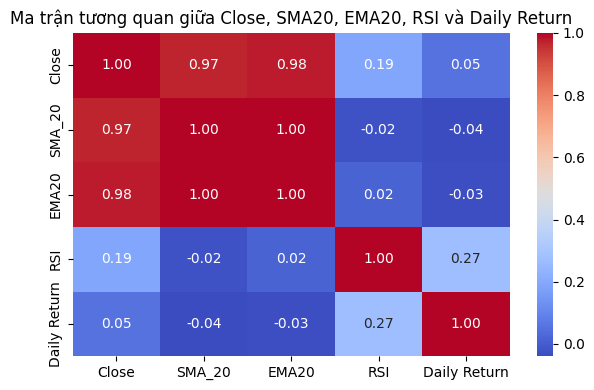

In [171]:
corr_data = df_after_check[['Close', 'SMA_20', 'EMA20', 'RSI', 'Daily Return']].dropna()

correlation_matrix = corr_data.corr()
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa Close, SMA20, EMA20, RSI và Daily Return")
plt.tight_layout()
plt.show()


                   RSI  Daily Return
RSI           1.000000      0.272894
Daily Return  0.272894      1.000000


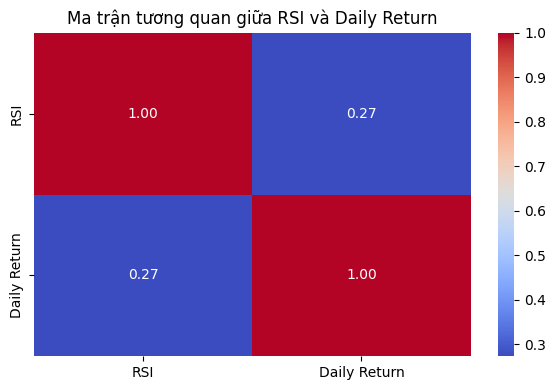

In [172]:
corr_data = df_after_check[['RSI', 'Daily Return']].dropna()

correlation_matrix = corr_data.corr()
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa RSI và Daily Return")
plt.tight_layout()
plt.show()


### **1.5.** Trực quan hóa dữ liệu:

#### 1.5.1  Biểu đồ giá đóng cửa kèm SMA, EMA và biếu đồ RSI:

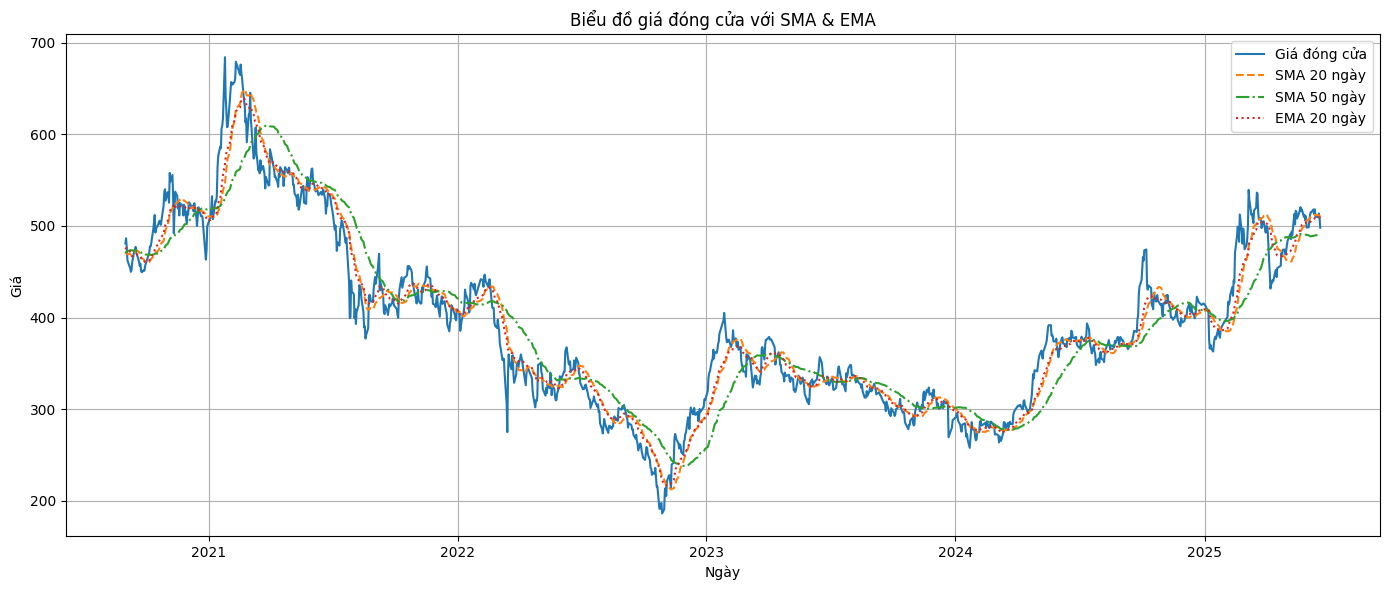

In [173]:
plt.figure(figsize=(14, 6))
plt.plot(df_after_check['Date'], df_after_check['Close'], label='Giá đóng cửa', linewidth=1.5)
plt.plot(df_after_check['Date'], df_after_check['SMA_20'], label='SMA 20 ngày', linestyle='--')
plt.plot(df_after_check['Date'], df_after_check['SMA_50'], label='SMA 50 ngày', linestyle='-.')
plt.plot(df_after_check['Date'], df_after_check['EMA20'], label='EMA 20 ngày', linestyle=':')
plt.title('Biểu đồ giá đóng cửa với SMA & EMA')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

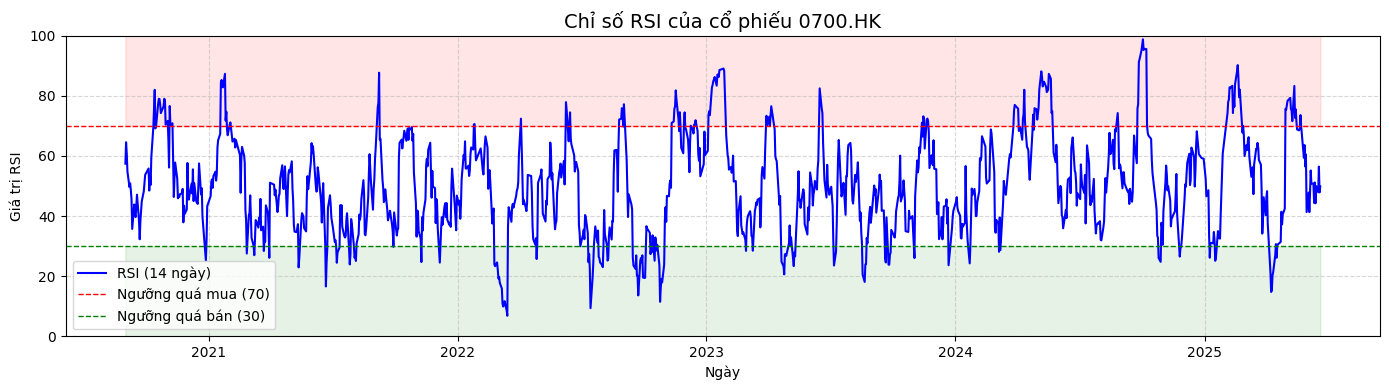

In [174]:
plt.figure(figsize=(14, 4))


plt.plot(df_after_check['Date'], df_after_check['RSI'], label='RSI (14 ngày)', color='blue', linewidth=1.5)


plt.axhline(70, color='red', linestyle='--', linewidth=1, label='Ngưỡng quá mua (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1, label='Ngưỡng quá bán (30)')


plt.fill_between(df_after_check['Date'], 70, 100, color='red', alpha=0.1)
plt.fill_between(df_after_check['Date'], 0, 30, color='green', alpha=0.1)

plt.title('Chỉ số RSI của cổ phiếu 0700.HK', fontsize=14)
plt.xlabel('Ngày')
plt.ylabel('Giá trị RSI')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()

#### 1.5.2  Biểu đồ histogram của lợi suất:

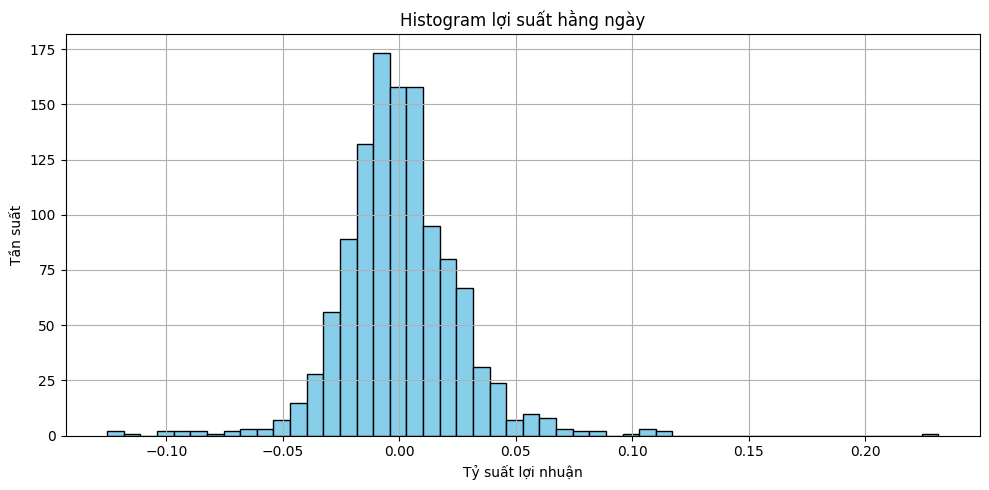

In [175]:
plt.figure(figsize=(10, 5))
plt.hist(df_after_check['Daily Return'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram lợi suất hằng ngày')
plt.xlabel('Tỷ suất lợi nhuận')
plt.ylabel('Tần suất')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1.5.3 Heatmap ma trận tương quan giữa các biến:

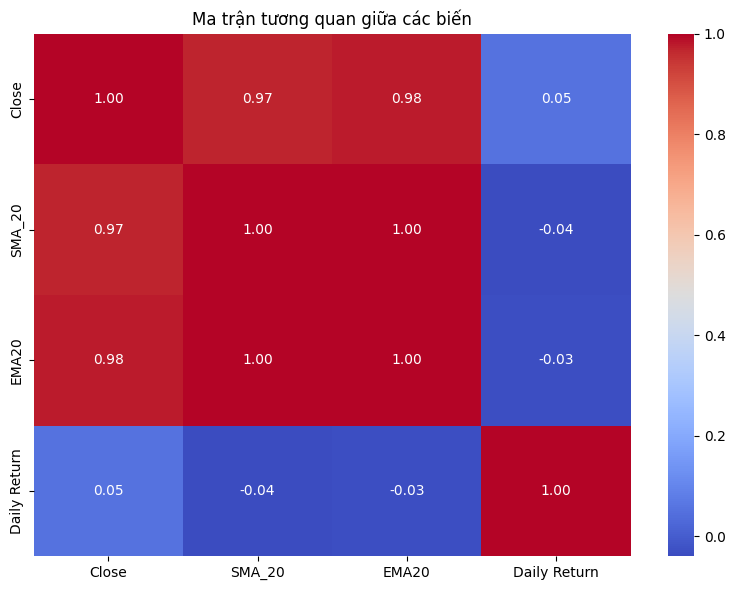

In [176]:
correlation_matrix = df_after_check[['Close', 'SMA_20', 'EMA20', 'Daily Return']].dropna().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.tight_layout()
plt.show()

### Bonus: Phân tích đơn giản một vài cổ phiếu có liên quan:
Cổ phiếu được chọn để so sánh và tiến hành đánh giá khách quan với Tencent là 3 mã của Alibaba (9988.HK), Baidu (9888.HK) và NetEast (9999.HK)

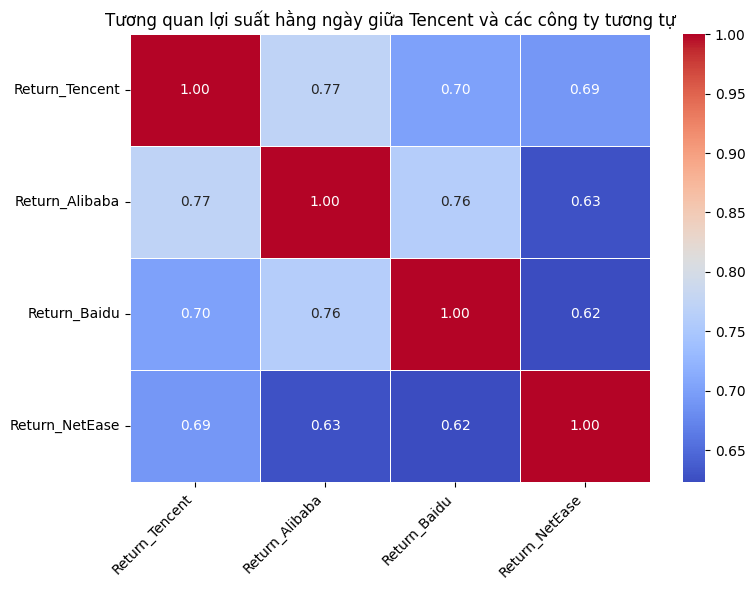

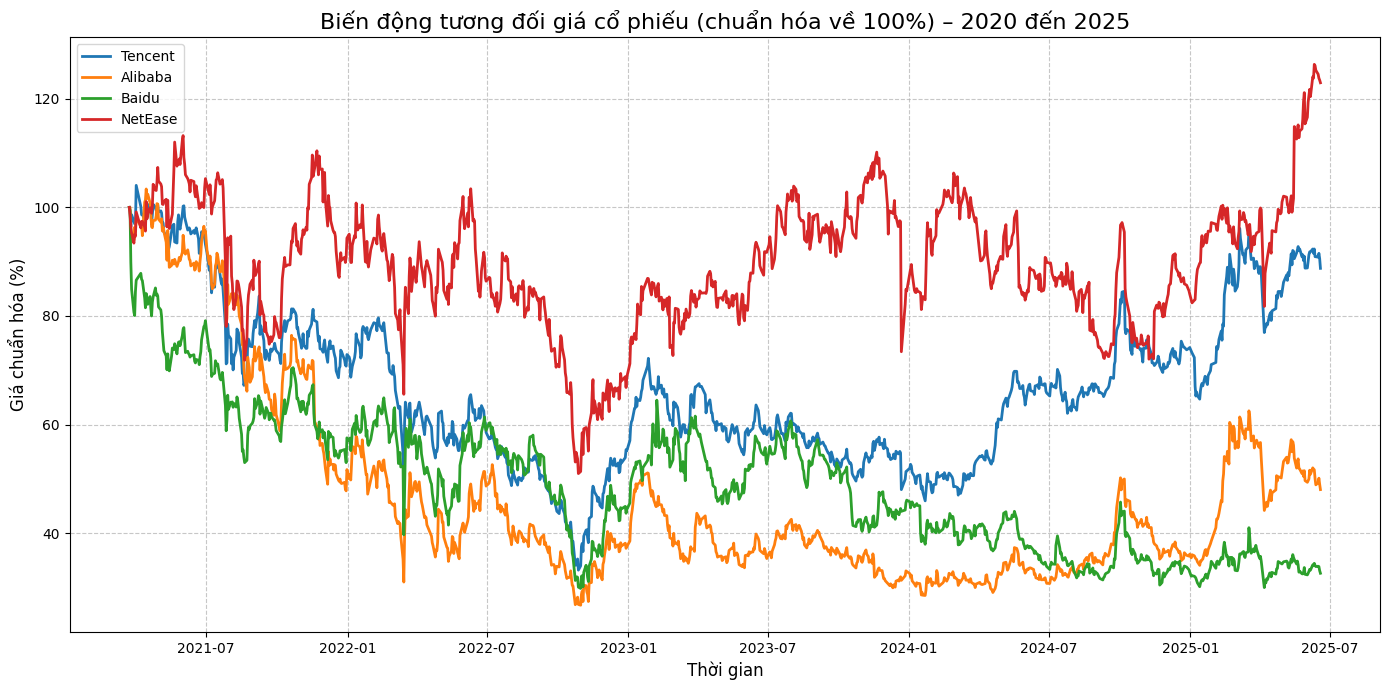

In [177]:
tickers = {
    "Tencent": "0700.HK",
    "Alibaba": "9988.HK",
    "Baidu": "9888.HK",
    "NetEase": "9999.HK"
}

df_returns = pd.DataFrame()
df_normalized_prices = pd.DataFrame()

for name, code in tickers.items():
    df = yf.Ticker(code).history(period="5y").reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df[f'Return_{name}'] = df['Close'].pct_change()

    if df_returns.empty:
        df_returns = df[['Date', f'Return_{name}']]
    else:
        df_returns = pd.merge(df_returns, df[['Date', f'Return_{name}']], on='Date', how='inner')

    df_temp_price = df[['Date', 'Close']].rename(columns={"Close": name})
    if df_normalized_prices.empty:
        df_normalized_prices = df_temp_price
    else:
        df_normalized_prices = pd.merge(df_normalized_prices, df_temp_price, on="Date", how="inner")

corr = df_returns.dropna().set_index('Date').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Tương quan lợi suất hằng ngày giữa Tencent và các công ty tương tự")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

df_norm_plot = df_normalized_prices.copy()
for name in tickers:
    df_norm_plot[name] = df_norm_plot[name] / df_norm_plot[name].iloc[0] * 100

plt.figure(figsize=(14, 7))
for name in tickers:
    plt.plot(df_norm_plot['Date'], df_norm_plot[name], label=name, linewidth=2)

plt.title("Biến động tương đối giá cổ phiếu (chuẩn hóa về 100%) – 2020 đến 2025", fontsize=16)
plt.xlabel("Thời gian", fontsize=12)
plt.ylabel("Giá chuẩn hóa (%)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.7 Diễn giải và rút ra kết luận:

Theo như phân tích và trực quan hóa, dễ dàng nhận thấy được: Các cổ phiếu có độ tương quan lớn với nhau (mọi chỉ số tương quan lợi suất ngày đều nằm trong khoảng từ xấp xỉ 0,7 đến 1), chứng tỏ mức độ phụ thuộc lớn vào xu hướng chung của thị trường và các biến động xã hội. 



 Xu hướng chính

- Trong giai đoạn **2020–2021**, giá cổ phiếu **Tencent** tăng mạnh, đạt đỉnh vào giữa năm 2021. Đây là thời điểm thị trường phục hồi hậu COVID và Tencent hưởng lợi từ sự tăng trưởng của game, mạng xã hội và fintech.
- Từ cuối năm 2021 đến hết 2023, giá cổ phiếu giảm sâu do ảnh hưởng từ các chính sách **siết chặt Big Tech** của chính phủ Trung Quốc, đặc biệt trong mảng dữ liệu, giáo dục và game.
- Từ đầu 2024, giá cổ phiếu có dấu hiệu phục hồi khi **chính sách dần nới lỏng**, và nhà nước tích cực hỗ trợ ngành công nghệ trong nước.



 Các giai đoạn biến động cao

- **2021–2022** là thời kỳ biến động mạnh nhất, do tác động chính sách bất ngờ và tâm lý thị trường tiêu cực.
- **Đầu 2020 và cuối 2023** là hai giai đoạn có **biến động thấp**, phản ánh tâm lý chờ đợi hoặc giảm kỳ vọng đầu tư.



 So sánh với các cổ phiếu cùng ngành

| Yếu tố                     | **Tencent**                     | **NetEase**                       | **Alibaba**                      | **Baidu**                         |
|----------------------------|----------------------------------|-----------------------------------|----------------------------------|-----------------------------------|
| **Mảng chính**            | Game, WeChat, fintech, đầu tư   | Game                              | TMĐT, điện toán đám mây, logistics | AI, tìm kiếm, xe tự lái           |
| **Rủi ro chính sách**     | Vừa                              | Thấp                              | Cao                               | Trung bình                        |
| **Hiệu suất 5 năm**       | Giảm rồi hồi phục                | Tăng mạnh                         | Giảm sâu                          | Dao động mạnh, phụ thuộc AI       |
| **Đầu tư quốc tế**        | Mạnh (Riot, Epic...)             | Trung bình                        | Mạnh (Lazada, SEA)               | Ít                                |
| **AI / công nghệ mới**    | Hunyuan LLM, AI game, WeBank AI | Game AI, nhận diện hình ảnh       | Alibaba Cloud, LLM riêng          | LLM Ernie, AI dẫn đầu TQ          |
| **Hệ sinh thái rộng**     | Rất rộng (WeChat, game, tài chính) | Trung bình (game-focused)       | Rộng (TMĐT, logistics)            | Hẹp (chủ yếu AI, search)          |


### Khuyến nghị đầu tư chi tiết

Dựa trên phân tích biến động giá cổ phiếu, tương quan tin tức – chính sách, và so sánh với các doanh nghiệp cùng ngành tại Trung Quốc, **Tencent Holdings Limited (0700.HK)** là cổ phiếu được **ưu tiên cao nhất** trong danh mục đầu tư công nghệ. Các lý do chi tiết như sau:



#### 🔹 1. Tencent – Cốt lõi của hệ sinh thái công nghệ Trung Quốc

**Khuyến nghị: MUA VÀ TÍCH LŨY DÀI HẠN**

- **Vị thế độc tôn trong hệ sinh thái số**: Tencent kiểm soát *WeChat*, cổng vào chính của đời sống số người dân Trung Quốc – kết hợp game, thanh toán, tin nhắn, thương mại, AI, y tế,... Đây là lợi thế độc nhất vô nhị.
- **Danh mục đầu tư chiến lược cực kỳ rộng**: Tencent là nhà đầu tư lớn của hàng chục công ty niêm yết lớn tại TQ và quốc tế (Meituan, JD, Pinduoduo, Epic, Riot...), giúp tăng giá trị nội tại lâu dài bất chấp biến động ngành.
- **Chuyển hướng mạnh mẽ sang AI và dịch vụ đám mây**: Tencent đã phát triển mô hình AI Hunyuan và đang tích hợp sâu vào hệ sinh thái. Với dữ liệu người dùng khổng lồ từ WeChat và QQ, Tencent có lợi thế vượt trội trong huấn luyện mô hình AI so với Baidu hoặc Alibaba.
- **Tài chính ổn định, chính sách cổ đông thân thiện**: Lợi nhuận bền vững, dòng tiền mạnh, thường xuyên mua lại cổ phiếu và chia cổ tức.

📊 **Chỉ số định lượng (2024)**:
| Chỉ số        | Giá trị gần nhất |
|---------------|------------------|
| P/E           | ~16.2            |
| ROE           | >20%             |
| Nợ/Vốn chủ    | < 35%            |
| Tăng trưởng EPS 5 năm | ~15%/năm   |

Nhìn chung, Tencent là **một trong những cổ phiếu công nghệ hiếm hoi của Trung Quốc** vừa có hệ sinh thái mạnh, vừa ít phụ thuộc duy nhất vào một dòng doanh thu. Điều này giúp Tencent chống chịu tốt trong giai đoạn biến động chính sách 2021–2023 và sẵn sàng bật lại khi thị trường ổn định.



#### 🔹 2. Đối trọng so sánh – Các công ty cùng ngành

| Công ty    | Đánh giá tổng quan | Vai trò trong phân tích |Khuyến nghị|
|------------|---------------------|--------------------------|---|
| **NetEase** | Tăng ổn định, ít bị ảnh hưởng chính sách, tập trung vào game. | Là đối thủ game trực tiếp, nhưng quy mô và tiềm lực AI yếu hơn Tencent. |Giữ hoặc mua ngắn hạn/trung hạn|
| **Alibaba** | Tái cấu trúc sâu, có rủi ro từ cạnh tranh nội địa và chính sách. | Dùng làm đối chứng về chiến lược tái cấu trúc và phân mảnh hệ sinh thái. |Theo dõi hoặc mua chọn lọc|
| **Baidu**   | Mạnh về AI, yếu về dòng tiền và phụ thuộc vào mảng search. | Dùng so sánh về năng lực AI và ứng dụng vào thực tế. |Rủi ro cao|

Các công ty này mang tính tham khảo, nhưng **không có công ty nào sở hữu hệ sinh thái và khả năng cân bằng rủi ro như Tencent**.



###  **Chiến lược đầu tư đề xuất**

> Trong bối cảnh Trung Quốc dần chuyển từ siết chặt sang hỗ trợ công nghệ, **Tencent là cổ phiếu trọng tâm nên tích lũy định kỳ**, theo chiến lược đầu tư giá trị – dài hạn (3–5 năm).
>
> Nên kết hợp chiến lược DCA (Dollar Cost Averaging – mua định kỳ), theo dõi các tín hiệu vĩ mô như chính sách hỗ trợ doanh nghiệp công nghệ, chính sách AI, tăng trưởng nội địa... để gia tăng tỷ trọng nếu điều kiện thuận lợi.
>
> **Tencent không phải là cổ phiếu tăng nóng**, nhưng là lựa chọn **an toàn và bền vững** cho nhà đầu tư có tầm nhìn.

